# 2D dose map analysis

In [6]:
!pip install SimpleITK
!pip install ipywidgets
!pip install pathlib

     ------------------------------------ 134.4/134.4 kB 993.1 kB/s eta 0:00:00
     ------------------------------------ 384.1/384.1 kB 306.7 kB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 388.8 kB/s eta 0:00:00


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
from ipywidgets import interact
import os
from pathlib import Path

In order to be able to run the interactive plot, you must install ipympl as indicated here: https://github.com/matplotlib/ipympl
This is activated by the previous `%matplotlib widget` line.

In [9]:
# Read a sitk image
filename = r"./output/Seg2_Sim/EBT3_results/doseDistribution-Edep.mhd"
img_ct = sitk.ReadImage(filename)
print('Image size: ', img_ct.GetSize())
print('Image spacing: ', img_ct.GetSpacing())
print('Image origin: ', img_ct.GetOrigin())

Image size:  (100, 1, 100)
Image spacing:  (0.5, 0.27799999713897705, 0.5)
Image origin:  (-24.75, 50.0, -24.75)


In [10]:
# Convert sitk image to a numpy array
arr_ct = sitk.GetArrayFromImage(img_ct)
print('Array size: ', arr_ct.shape, ' <--- be careful to the dimension order!)')

Array size:  (100, 1, 100)  <--- be careful to the dimension order!)


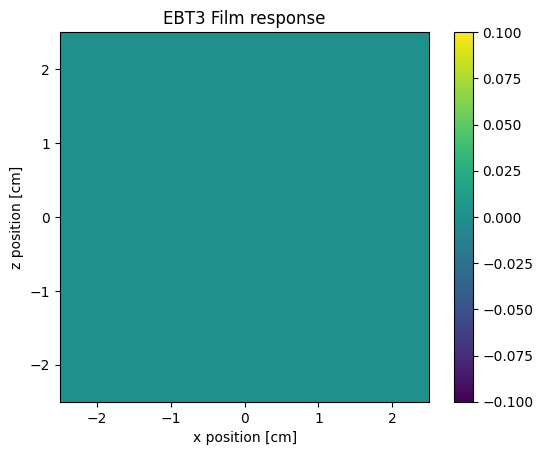

In [11]:
plt.imshow(arr_ct[:,0,:], extent=(-2.5,2.5,-2.5,2.5))
plt.xlabel("x position [cm]")
plt.ylabel("z position [cm]")
plt.title("EBT3 Film response")
plt.colorbar()

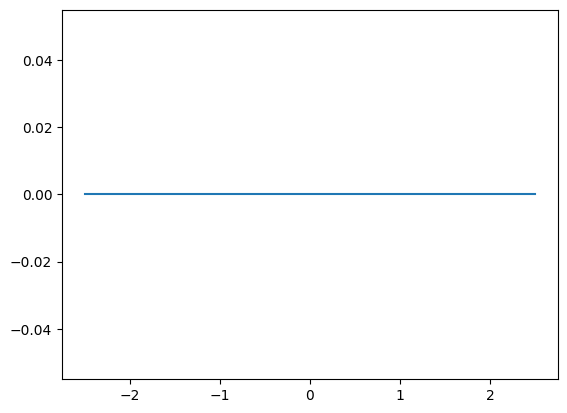

In [12]:
x = arr_ct[:,0,49]
# = 100*x/x.max()
n = np.linspace(-2.5,2.5,100)
plt.plot(n,x)